# Predicting Diabetes

*Import Libraries*

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


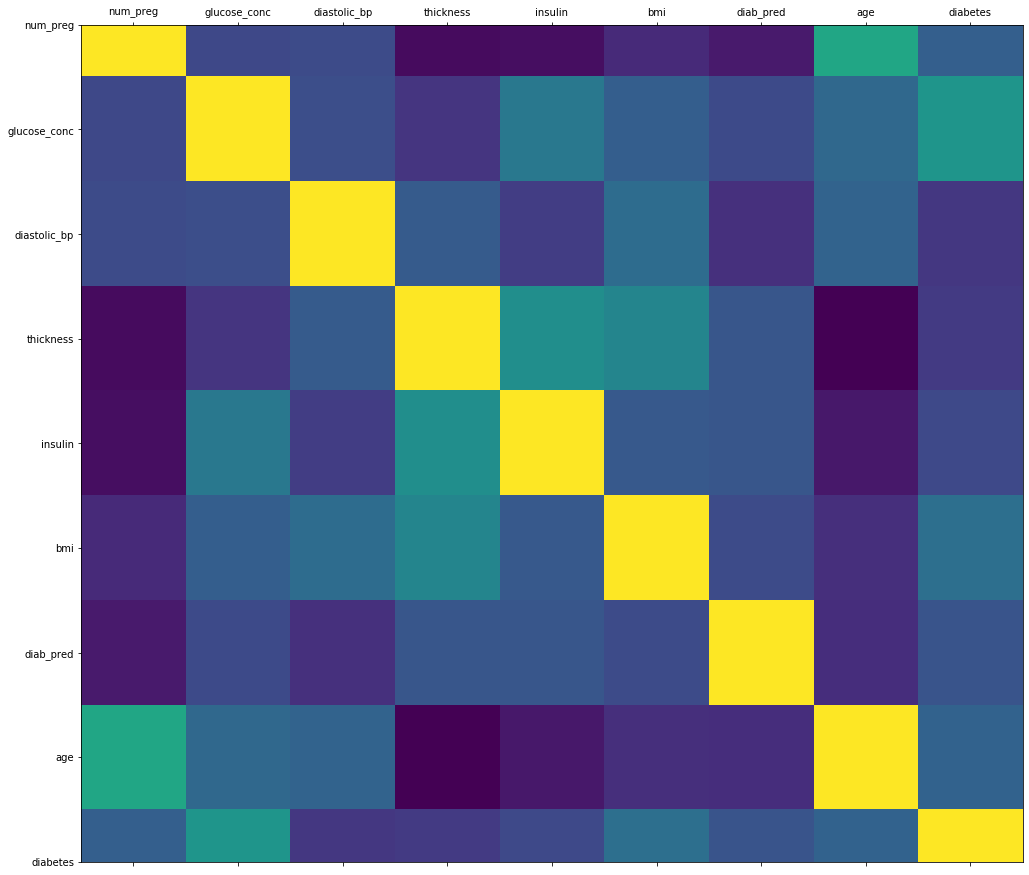

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

df = pd.read_csv("C:\\Contents\\Txt\MachineLearningWithPython-master\\MachineLearningWithPython-master\\Notebooks\\data\\pima-data.csv")

#df.head()
#df.shape
#df.tail()
#df.plot()
#df.isnull().values.any()


def plot_corr(df,size = 11):
    f = plt.figure(figsize=(19, 15))
    corr = df.corr()
    plt.matshow(corr, fignum=f.number)
    #fig, ax = plt.subplots(size,size)
    #ax.show(corr)
    #plt.plot(ax)
    #ax.matshow(corr)
    #ax.plot(corr)
    #plt.plot(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    #print(dir(ax))
    #plt.show()
    
#plot_corr(df)

del df['skin']
plot_corr(df)
df.corr()

In [2]:
diabetes_map = {True : 1, False :0}
df['diabetes'] = df['diabetes'].map(diabetes_map)
#len(df[df.diabetes==1])

len(df.loc[df['diabetes'] ==1])
df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'diabetes'],
      dtype='object')

In [3]:
from sklearn.model_selection import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

X = df[feature_col_names].values
Y = df[predicted_class_names].values
split_test_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=split_test_size, random_state = 42)


In [9]:
from sklearn.preprocessing import Imputer
fill_0 = Imputer(missing_values = 0, strategy="mean", axis = 0)

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train.ravel())


nb_predict_train = nb_model.predict(X_train)
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

print("Accuracy training : {0:.4f}".format(metrics.accuracy_score(y_train,nb_predict_train )))
print("Accuracy testing : {0:.4f}".format(metrics.accuracy_score(y_test,nb_predict_test )))
print('**********Confusion metrics**************')
print("{}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print('**********Classsification report**************')
print("{}".format(metrics.classification_report(y_test, nb_predict_test)))

Accuracy training : 0.7542
Accuracy testing : 0.7359
**********Confusion metrics**************
[[118  33]
 [ 28  52]]
**********Classsification report**************
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [10]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(X_train, y_train.ravel())

rf_predict_train = rf_model.predict(X_train)
rf_predict_test = rf_model.predict(X_test)

from sklearn import metrics

print("RF Accuracy training : {0:.4f}".format(metrics.accuracy_score(y_train,rf_predict_train )))
print("RF Accuracy testing : {0:.4f}".format(metrics.accuracy_score(y_test,rf_predict_test )))
print('********** RF Confusion metrics**************')
print("{}".format(metrics.confusion_matrix(y_test, rf_predict_test)))
print('**********RF Classsification report**************')
print("{}".format(metrics.classification_report(y_test, rf_predict_test)))

RF Accuracy training : 0.9870
RF Accuracy testing : 0.7100
********** RF Confusion metrics**************
[[121  30]
 [ 37  43]]
**********RF Classsification report**************
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       151
           1       0.59      0.54      0.56        80

    accuracy                           0.71       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.70      0.71      0.71       231



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [12]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train.ravel())
lr_predict_train = lr_model.predict(X_train)
lr_predict_test = lr_model.predict(X_test)

from sklearn import metrics

print("LR Accuracy training : {0:.4f}".format(metrics.accuracy_score(y_train,lr_predict_train )))
print("LR Accuracy testing : {0:.4f}".format(metrics.accuracy_score(y_test,lr_predict_test )))
print('********** LR Confusion metrics**************')
print("{}".format(metrics.confusion_matrix(y_test, lr_predict_test)))
print('**********LR Classsification report**************')
print("{}".format(metrics.classification_report(y_test, lr_predict_test)))

LR Accuracy training : 0.7747
LR Accuracy testing : 0.7532
********** LR Confusion metrics**************
[[128  23]
 [ 34  46]]
**********LR Classsification report**************
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       151
           1       0.67      0.57      0.62        80

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.75      0.75      0.75       231



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
